## Naive Bayes ML Algorithm
#### An ML model used to predict wheather a patient has a hearth diseas or not based on certain condition

In [77]:
# importing the libraries
import pandas as pd
hearth_ds = pd.read_csv(r"E:\Ezekiel\Datasets\Naive_Bayes_Heart_Disease.csv")    
hearth_ds.head(10)

,age,sex,Chest_Pain,Blood_Pressure(mm Hg),cholestoral (mg/dl),Fasting_Blood_Sugar,resting electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia,Diagnosis_of_Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [78]:
# shape 
hearth_ds.shape

(303, 14)

In [79]:
# renaming the columns
hearth_ds1 = hearth_ds.rename( columns = {'Blood_Pressure(mm Hg)': 'Blood_Pressure',
                              'cholestoral (mg/dl)': 'cholestoral', 'resting electrocardiographic': 'resting_electrocardiographic',
                              'ST Depression':'ST_Depression'})

In [80]:
hearth_ds1.head()

,age,sex,Chest_Pain,Blood_Pressure,cholestoral,Fasting_Blood_Sugar,resting_electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST_Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia,Diagnosis_of_Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
hearth_ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           303 non-null    int64  
 1   sex                           303 non-null    int64  
 2   Chest_Pain                    303 non-null    int64  
 3   Blood_Pressure                303 non-null    int64  
 4   cholestoral                   303 non-null    int64  
 5   Fasting_Blood_Sugar           303 non-null    int64  
 6   resting_electrocardiographic  303 non-null    int64  
 7   Maximum_Heart_Rate            303 non-null    int64  
 8   Excersize_Includes            303 non-null    int64  
 9   ST_Depression                 303 non-null    float64
 10  Slope_of_Excersize            303 non-null    int64  
 11  Number_of_vessels             303 non-null    int64  
 12  Thalassemia                   303 non-null    int64  
 13  Diagn

In [50]:
hearth_ds1.isnull().sum()

age                             0
sex                             0
Chest_Pain                      0
Blood_Pressure                  0
cholestoral                     0
Fasting_Blood_Sugar             0
resting_electrocardiographic    0
Maximum_Heart_Rate              0
Excersize_Includes              0
ST_Depression                   0
Slope_of_Excersize              0
Number_of_vessels               0
Thalassemia                     0
Diagnosis_of_Heart_Disease      0
dtype: int64

## Data Visualization

In [51]:
hearth_ds1.head()

,age,sex,Chest_Pain,Blood_Pressure,cholestoral,Fasting_Blood_Sugar,resting_electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST_Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia,Diagnosis_of_Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


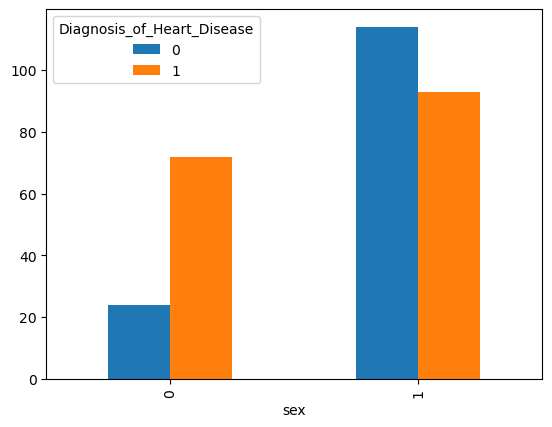

In [52]:
import matplotlib.pyplot as plt

# ploting the cross tapulation data for the bar chart
pd.crosstab(hearth_ds1['sex'], hearth_ds1['Diagnosis_of_Heart_Disease']).plot(kind='bar')

plt.show()

<AxesSubplot:xlabel='age', ylabel='Blood_Pressure'>

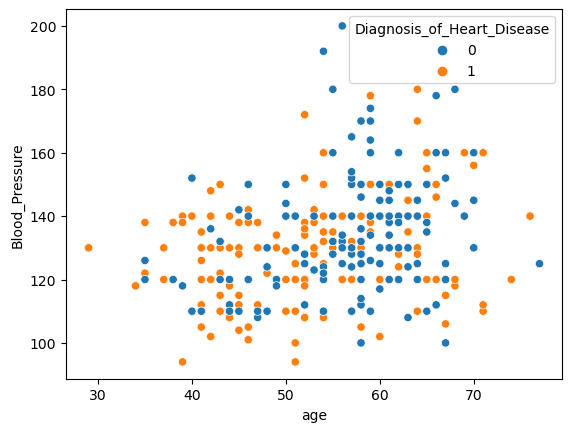

In [54]:
import seaborn as sns

sns.scatterplot(x= 'age', y= "Blood_Pressure", hue= "Diagnosis_of_Heart_Disease", data = hearth_ds1 )

<AxesSubplot:xlabel='age', ylabel='Blood_Pressure'>

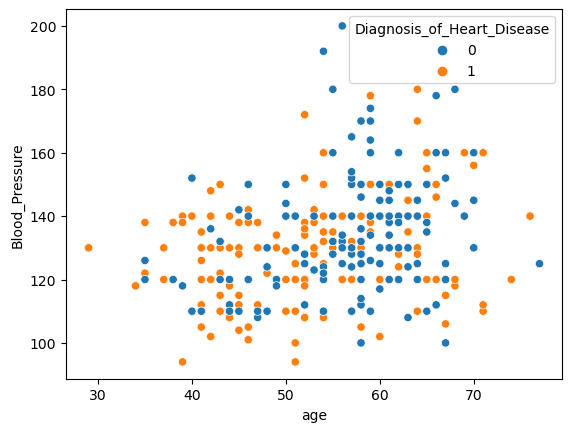

In [55]:

sns.scatterplot(x= 'age', y= "Blood_Pressure", hue= "Diagnosis_of_Heart_Disease", data = hearth_ds1 )

<AxesSubplot:xlabel='age', ylabel='cholestoral'>

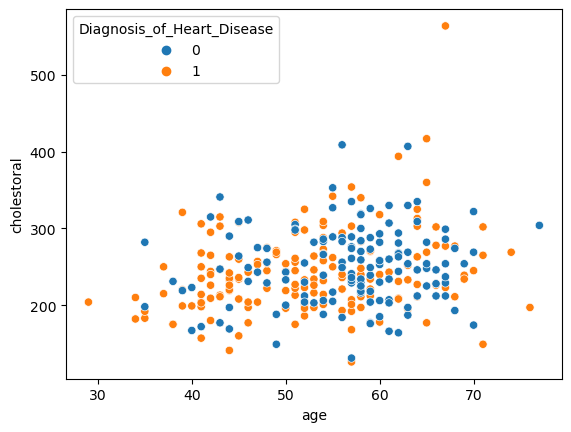

In [56]:

sns.scatterplot(x= 'age', y= "cholestoral", hue= "Diagnosis_of_Heart_Disease", data = hearth_ds1 )

In [57]:
pd.crosstab(hearth_ds1 ['Excersize_Includes'], hearth_ds1 ['Diagnosis_of_Heart_Disease'] )

Diagnosis_of_Heart_Disease,0,1
Excersize_Includes,,
0,62,142
1,76,23


In [13]:
from sklearn.naive_bayes import BernoulliNB

In [58]:
data = hearth_ds1.iloc[:, :13] #input features

target= hearth_ds1.iloc[:, 13] # target feature

In [59]:
data.head()

,age,sex,Chest_Pain,Blood_Pressure,cholestoral,Fasting_Blood_Sugar,resting_electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST_Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [82]:
target.shape

(303,)

In [61]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

data= scaler.fit_transform(data)

In [62]:
# splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (data, target, train_size = 0.7)

In [63]:
# model training
model= BernoulliNB()
model.fit(X_train, Y_train)

BernoulliNB()

In [64]:
x_train_prediction= model.predict(X_train)
training_data_accuracy= accuracy_score (x_train_prediction, Y_train)

In [65]:
print (training_data_accuracy) 

0.839622641509434


In [66]:
# model prediction
pred = model.predict(X_test)

In [67]:
#checking the model accuracy

from sklearn.metrics import *
accuracy_score (Y_test, pred)

0.8461538461538461

### Making a Predictive System

In [68]:
import numpy as np
import warnings
warnings.simplefilter('ignore')
input_data =(59,1,0,170,326,0,0,140,1,3.4,0,0,3)

## changing input data to numpy array because processing is easier than list 
input_data_as_numpy_array= np.array(input_data)
# reshaping the array for predicting 

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standadize the input data

std_data=scaler.transform(input_data_reshaped)

print(std_data)

prediction = model.predict(std_data)

print(prediction)

if prediction [0] == 0:
    print("The Person Does not have a Heart Disease")
else:
    print("The Person has Heart Disease")


[[ 0.5110413   0.68100522 -0.93851463  2.19177836  1.54093615 -0.41763453
  -1.00583187 -0.42186226  1.43548113  2.03630317 -2.27457861 -0.71442887
   1.12302895]]
[0]
The Person Does not have a Heart Disease


In [69]:
### Saving the training model

import pickle # pickle library has functions needed to save the model

In [70]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [71]:
### Loading the saved model

loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [72]:
input_data =(59,1,0,170,326,0,0,140,1,3.4,0,0,3)

## changing input data to numpy array because processing is easier than list 
input_data_as_numpy_array= np.array(input_data)
# reshaping the array for predicting 

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standadize the input data

std_data=scaler.transform(input_data_reshaped)

print(std_data)

prediction = loaded_model.predict(std_data)

print(prediction)

if prediction [0] == 0:
    print("The Person Does not have a Heart Disease")
else:
    print("The Person has Heart Disease")

[[ 0.5110413   0.68100522 -0.93851463  2.19177836  1.54093615 -0.41763453
  -1.00583187 -0.42186226  1.43548113  2.03630317 -2.27457861 -0.71442887
   1.12302895]]
[0]
The Person Does not have a Heart Disease
